
#  Investigating Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Soccer database contains data about 11 Europion Leageas over 8 seasons from 2008/2009 to 2015/2016. It contains spacific tables for country , league , match , team , team_attributes , player and player_attributes.
Exploring Soccer database raised three intersting questions.

> First question: What is the League with the highest score rate? 

> Second question: Is playing in the tean's home increases winning chances?

> Third question: Does creating more shooting chances affect number of wins?

> In the following sections we will wrangle and explore the data to answer these questions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> ### Gathering data


- I downloaded the data form [kaggle](https://www.kaggle.com/hugomathien/soccer)

- After that,  I used DB browser to deal with the data

- I used the following SQL code to join requried tables for analysis:

```
select *
from Country c
JOIN League l
on c.id = l.country_id
JOIN Match m
on c.id = m.country_id
```
- Finally, I dawnloaded the query results as csv file, and I uploaded it to the workspace.

> ### Reading the csv file



In [2]:
df = pd.read_csv('Soccer Database.csv')

df.head()

,id,name,id.1,country_id,name.1,id.2,country_id.1,league_id,season,stage,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,Belgium,1,1,Belgium Jupiler League,2,1,1,2008/2009,1,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
1,1,Belgium,1,1,Belgium Jupiler League,3,1,1,2008/2009,1,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
2,1,Belgium,1,1,Belgium Jupiler League,5,1,1,2008/2009,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
3,1,Belgium,1,1,Belgium Jupiler League,7,1,1,2008/2009,1,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
4,1,Belgium,1,1,Belgium Jupiler League,8,1,1,2008/2009,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20


> ### Inspecting  data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 120 entries, id to BSA
dtypes: float64(96), int64(12), object(12)
memory usage: 23.8+ MB


In [4]:
df.dtypes

id                    int64
name                 object
id.1                  int64
country_id            int64
name.1               object
id.2                  int64
country_id.1          int64
league_id             int64
season               object
stage                 int64
date                 object
match_api_id          int64
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
home_player_X1      float64
home_player_X2      float64
home_player_X3      float64
home_player_X4      float64
home_player_X5      float64
home_player_X6      float64
home_player_X7      float64
home_player_X8      float64
home_player_X9      float64
home_player_X10     float64
home_player_X11     float64
away_player_X1      float64
away_player_X2      float64
away_player_X3      float64
                     ...   
B365H               float64
B365D               float64
B365A               float64
BWH                 float64
BWD                 

### Some columns have undescribtive names. 

In [5]:
df.duplicated().sum()

0

### Good news ....... No duplicated rows !!

In [6]:
df.isnull().sum()

id                      0
name                    0
id.1                    0
country_id              0
name.1                  0
id.2                    0
country_id.1            0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

###  Many columns have null values

_______________________________________________
### Data Cleaning 

### Assessing Data porblems

- Many columns have null values
- Many columns have non descriptive names
- Many columns does not have adding value to the analysis
- Date coulmn type needs to be changed

###  Creating a copy from the data


In [7]:
df_1 = df.copy()


### Droping columns with null values

In [8]:
df_2 = df.dropna(axis =1)

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 16 columns):
id                  25979 non-null int64
name                25979 non-null object
id.1                25979 non-null int64
country_id          25979 non-null int64
name.1              25979 non-null object
id.2                25979 non-null int64
country_id.1        25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(12), object(4)
memory usage: 3.2+ MB


### Rename 'name' column to 'country'

In [9]:
df_2.rename(columns={'name': 'country'}, inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### Rename name.1 coulmn to league

In [10]:
df_2.rename(columns={'name.1': 'league'}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### Droping non adding value columns

In [11]:
df_clean = df_2.drop(['id' , 'id.1' , 'id.2' , 'country_id' , 'country_id.1' , 'league_id'] , axis = 1)

In [12]:
df_clean.head()

,country,league,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,2
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,2


### Changing date column type

In [13]:
df_clean['date']= pd.to_datetime(df_clean['date'])

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
country             25979 non-null object
league              25979 non-null object
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null datetime64[ns]
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 2.0+ MB


_______________________________________________________________________
<a id='eda'></a>
## Exploratory Data Analysis



> ### Question 1: What is the League with the highest score rate?

### Creating a new column for number of goals

In [15]:

df_clean['match_goals'] = df_clean.home_team_goal + df_clean.away_team_goal



### Calclating number of goals for each league

In [16]:
number_of_goals = df_clean.groupby('country').match_goals.sum()
number_of_goals

country
Belgium        4841
England        8240
France         7427
Germany        7103
Italy          7895
Netherlands    7542
Poland         4656
Portugal       5201
Scotland       4804
Spain          8412
Switzerland    4166
Name: match_goals, dtype: int64

### Calclating number of matches

In [17]:
number_of_matchs = df_clean.groupby('country').match_goals.count()
number_of_matchs

country
Belgium        1728
England        3040
France         3040
Germany        2448
Italy          3017
Netherlands    2448
Poland         1920
Portugal       2052
Scotland       1824
Spain          3040
Switzerland    1422
Name: match_goals, dtype: int64

### Calclating scoring rate

In [18]:
scoring_rate = number_of_goals  / number_of_matchs
scoring_rate

country
Belgium        2.801505
England        2.710526
France         2.443092
Germany        2.901552
Italy          2.616838
Netherlands    3.080882
Poland         2.425000
Portugal       2.534600
Scotland       2.633772
Spain          2.767105
Switzerland    2.929677
Name: match_goals, dtype: float64

### Sorting scoring rates so the bar plot can be ordered decendingly

In [19]:

scoring_rate_sorted= scoring_rate.sort_values(ascending = False)

### Creating a bar plot to enable us to see witch Country has the highest scoring rate

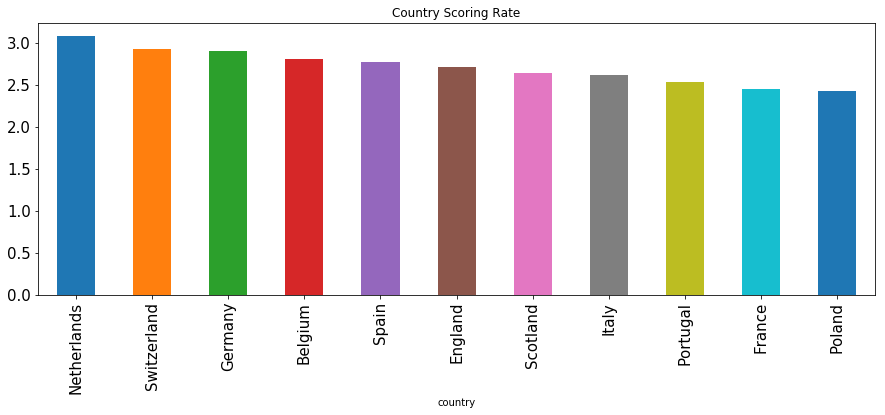

In [20]:

scoring_rate_sorted.plot(kind = 'bar' , title = 'Country Scoring Rate' , figsize = (15,5) , fontsize = 15);

### From the obve graph Netherlands has the highest scoring rate which is 3 goals per match

_________________________________________________________________________________
_________________________________________________________________________________

> ### Question 2:   Is playing home increases winning chances?

### Creating a new column for winner, so we can know who won the match: home team , away team or no winner

In [21]:

df_clean['winner'] = np.where(df_clean['home_team_goal'] > df_clean['away_team_goal'] , 'home', np.where(df_clean['home_team_goal'] < df_clean['away_team_goal'] , 'away' , 'no_winner') )


### Calclating number of wins by excluding non winner matches


In [22]:
number_of_wins = df_clean[df_clean['winner'] != 'no_winner']


### Creating a bar plot so we can see the difference between them graphically

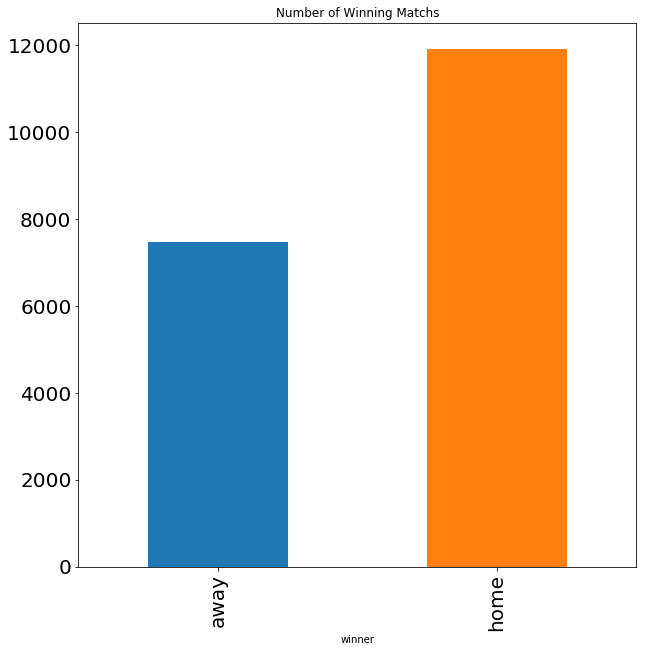

In [23]:
number_of_wins.groupby('winner').winner.count().plot( kind = 'bar', title = 'Number of Winning Matchs' , figsize = (10 ,10) , fontsize = 20 );

### From the graph , home teams won about 12000 matchs, and away teams won about 7500 matchs , so may be playing in home increases team chances to win

> ### Question 3: Does creating more shooting chances affect number of wins?

- #### To address this question, I returned back to soccer database and extracted the average  chances creating shooting 

### Reading the extracted data

In [24]:
avg_shooting_chances = pd.read_csv('avg_team_shooting_change.csv')
avg_shooting_chances.head()

,team_api_id,avg(chanceCreationShooting)
0,1601,53.5
1,1773,54.0
2,1957,67.0
3,2033,48.2
4,2182,68.0


### Renaming 'avg(chanceCreationShooting' column to more describtive one 

In [25]:
avg_shooting_chances.rename(columns={'avg(chanceCreationShooting)': 'chance_Creation_Shooting'}, inplace=True)
avg_shooting_chances.head()

,team_api_id,chance_Creation_Shooting
0,1601,53.5
1,1773,54.0
2,1957,67.0
3,2033,48.2
4,2182,68.0


### Creating new column for winner_id so we can determine witch team won the match

In [26]:
df_clean['winner_id'] = np.where(df_clean['home_team_goal'] > df_clean['away_team_goal'] , df_clean['home_team_api_id'], np.where(df_clean['home_team_goal'] < df_clean['away_team_goal'] , df_clean['home_team_api_id'] , '') )

df_clean.head()

,country,league,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,match_goals,winner,winner_id
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,492474,10000,9994,0,0,0,no_winner,
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,492475,9984,8635,0,3,3,away,9984
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,492477,7947,9985,1,3,4,away,7947
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,492479,9999,8571,2,2,4,no_winner,
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,492480,4049,9996,1,2,3,away,4049


### Merging 'df_clean' with 'avg_shooting_chances' so we can associate eatch winning team with its shooting chances

In [27]:
# cange team_api_id column type to enable merging
avg_shooting_chances['team_api_id'] = avg_shooting_chances['team_api_id'].astype('str')

In [28]:
df_combined = df_clean.merge(avg_shooting_chances, left_on='winner_id', right_on='team_api_id', how='inner')

In [29]:
df_combined.head()

,country,league,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,match_goals,winner,winner_id,team_api_id,chance_Creation_Shooting
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,492475,9984,8635,0,3,3,away,9984,9984,48.0
1,Belgium,Belgium Jupiler League,2008/2009,3,2008-08-30,492493,9984,9998,2,1,3,home,9984,9984,48.0
2,Belgium,Belgium Jupiler League,2008/2009,5,2008-09-20,492519,9984,9993,1,0,1,home,9984,9984,48.0
3,Belgium,Belgium Jupiler League,2008/2009,7,2008-10-05,492539,9984,9985,4,1,5,home,9984,9984,48.0
4,Belgium,Belgium Jupiler League,2008/2009,9,2008-10-25,492558,9984,7947,1,2,3,away,9984,9984,48.0


### Ploting scatter for the relationship between shooting chances and number of wins so we can detemine if there is a relationship and its direction.

In [30]:
number_of_wins2 = df_combined.groupby('winner_id').winner_id.count()


In [31]:
shooting_chances = df_combined.groupby('winner_id').chance_Creation_Shooting.sum()


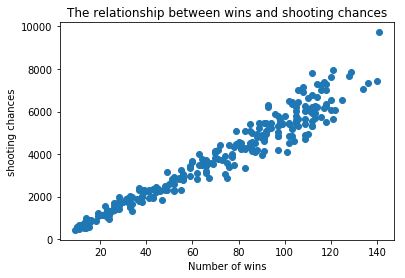

In [32]:
plt.scatter(number_of_wins2 , shooting_chances );
plt.title('The relationship between wins and shooting chances');
plt.xlabel('Number of wins');
plt.ylabel('shooting chances');
plt.FontSize = 50;


## From the obove plot, there is a line sloping upword and it presented a positive relationship between shooting chances and number of wins.
## As number of shooting chances increases from 0 to 10000, number of wins increases from 0 to 140

## Limitations

#### - Soccer database has a lot of missing value. I keept just 12 columns from 120 becuase of this problem.
#### - I did not use inferential statistics, so the inferntial power of the results are limited.


<a id='conclusions'></a>
## Conclusions

> I love soccer, so I chose soccer database for this project. Firstlly I wrangled it to produce more clear and consiced database.
Exploring the database raised three intersting questions.

**First question**,  What is the League with the highest score rate? , **The answer**  is Netherlands.
**Second question**, Is playing home increases winning chances?  **Results showed** that home teams won more matchs than away teams, so may be playing in home increases team chances to win. **Third queston**, Does creating more shooting chances affect number of wins?  **Analysis shows** that there is a positive relationship between the two variables.


In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0